In [1]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
%matplotlib inline

twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry


## Loading data

Time to use the data from my pipeline.

In [2]:
# Read file obtained from my pipeline
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=0)
usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


In [3]:
# A quick look at some statistics
usage_df.describe()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
count,55.000000,55.000000,56.000000,57.000000,58.000000,59.000000,61.000000,62.000000,62.000000,64.000000,...,76.000000,77.000000,78.000000,79.000000,84.000000,84.000000,84.000000,84.000000,84.000000,88.000000
mean,0.018176,0.018185,0.017857,0.017542,0.017245,0.016944,0.016397,0.016126,0.016126,0.015625,...,0.013155,0.012990,0.012822,0.012653,0.011902,0.011900,0.011908,0.011905,0.011904,0.011365
std,0.026351,0.025407,0.025232,0.024279,0.020734,0.022918,0.022495,0.022204,0.022496,0.022867,...,0.015316,0.015382,0.015139,0.014638,0.012257,0.012348,0.012694,0.012796,0.012711,0.012278
min,0.000900,0.000900,0.000800,0.000600,0.000900,0.000700,0.000800,0.001000,0.000800,0.001100,...,0.000800,0.000900,0.001000,0.000700,0.000600,0.000900,0.000600,0.000900,0.000600,0.000100
25%,0.005000,0.005050,0.004950,0.004900,0.004500,0.004800,0.005500,0.004925,0.004525,0.004850,...,0.003875,0.004000,0.003675,0.004050,0.004200,0.004000,0.004275,0.003850,0.003775,0.003600
50%,0.010400,0.010500,0.009150,0.009700,0.009450,0.008400,0.008300,0.008200,0.008250,0.008000,...,0.008250,0.008200,0.007300,0.007300,0.007700,0.008350,0.008050,0.007950,0.007950,0.007050
75%,0.019200,0.018200,0.017650,0.017100,0.018875,0.018150,0.018000,0.017700,0.017175,0.016200,...,0.015125,0.014600,0.014675,0.014800,0.013875,0.014425,0.013925,0.014625,0.014875,0.015050
max,0.171000,0.159800,0.154800,0.146200,0.094100,0.121700,0.136900,0.129000,0.130100,0.141600,...,0.073800,0.071300,0.078500,0.077100,0.063500,0.059600,0.064200,0.065300,0.066300,0.061900


The missing values actually work to my advantage here, the addition of new weapons is represented by the weapon count increasing and the mean usage decreases due to there being more weapons.

## Spaghetti plot visualization

A good way to look at these multiple timeseries is with a spaghetti plot. It is not very good for presenting but can help me visualize data.

In [4]:
def spaghetti(df, name='Spaghetti Plot'):
    """ 
    Makes a spaghetti plot out of a dataframe, includes a mean line.
  
    Parameters: 
    df (df): a Pandas dataframe indexed with the variables to plot and columns containing timeframe data.
    name (str): Name of plot.
  
    Returns: 
    nothing, but prints a plot
    """
        
    # Transpose for plotting
    dft = df.transpose()
    
    # Make new collumn to plot x
    dft['x'] = np.arange(1, dft.shape[0]+1)

    # multiple line plot
    fig, ax = plt.subplots(1, figsize=(16, 8))
    num=0
    for column in dft.drop('x', axis=1):
        num+=1
        ax.plot(dft['x'], dft[column], marker='', linewidth=2, alpha=0.7, label=column)
        
    # Plot a mean line
    x = np.arange(1,32)
    ax.plot(x, df.mean()[x-1], linewidth=6, color='black')

    # Add legend
    ax.legend(loc=2, ncol=2)

    # Add titles
    plt.title(name, loc='center', fontsize=30, fontweight=0)
    plt.xlabel("Time (Weeks starting from 10/28/17)", fontsize=20)
    plt.ylabel("Usage", fontsize=20);

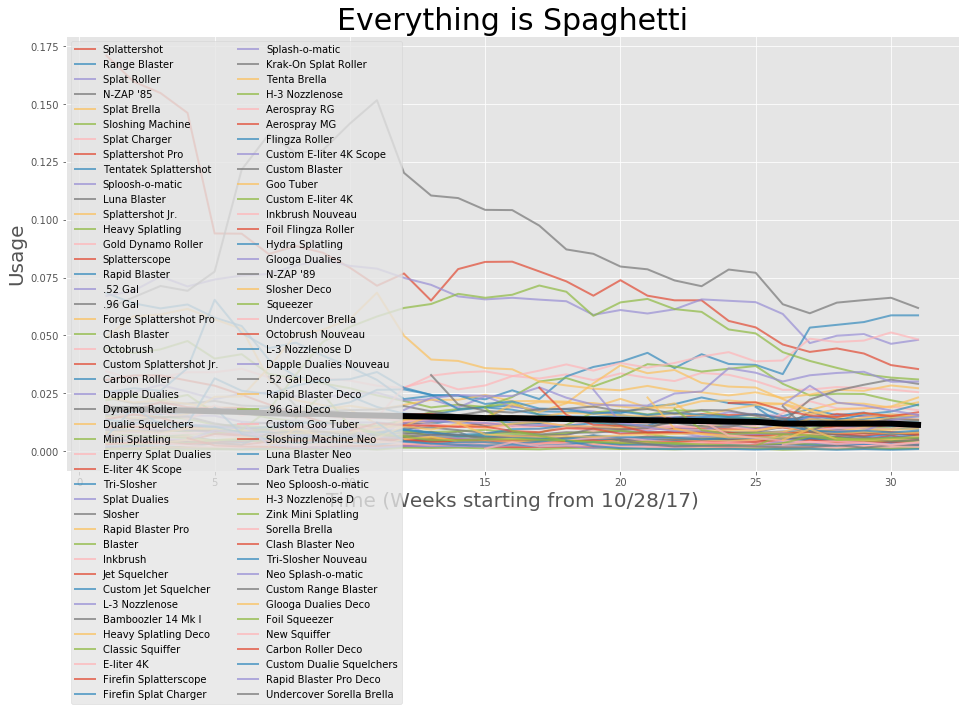

In [5]:
spaghetti(usage_df, 'Everything is Spaghetti')

This plot is next to useless, and not quite worth the effor tot make it actually readable. Time to look at a smaller subset.

## A better spaghetti
I decide to took at only the most used weapons according to multiple criteria.

In [6]:
# Top 10 in final week
final = usage_df.sort_values(by=['Week 31'], ascending=False).head(10)

In [7]:
# Top 10 in overall usage
tdf = usage_df.transpose()
overall = tdf.reindex(tdf.mean().sort_values(ascending=False).index, axis=1).transpose().head(10)
# In this case I use mean instead of sum since mean ignores the empty values
# which compensates for weapons added later in the game.

In [8]:
# Top 10 in peak usage
tdf = usage_df.transpose()
peak = tdf.reindex(tdf.max().sort_values(ascending=False).index, axis=1).transpose().head(10)

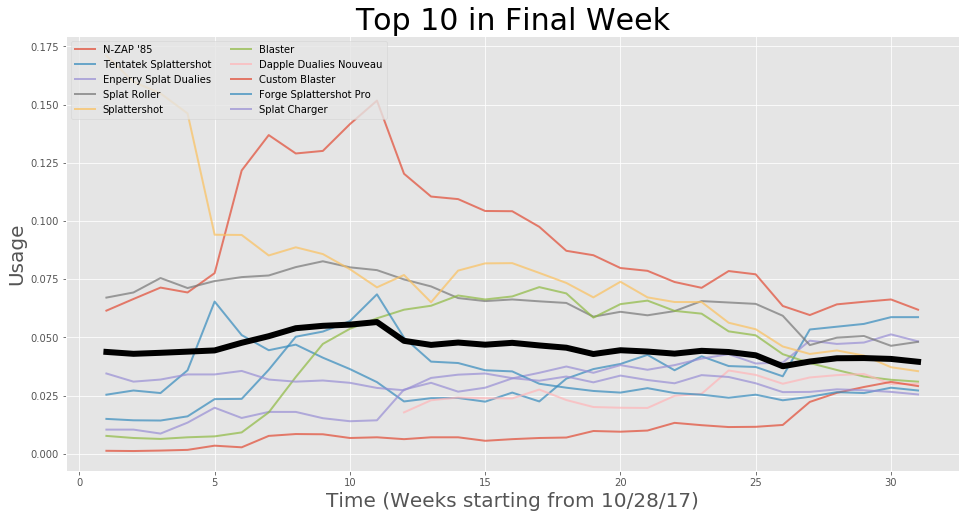

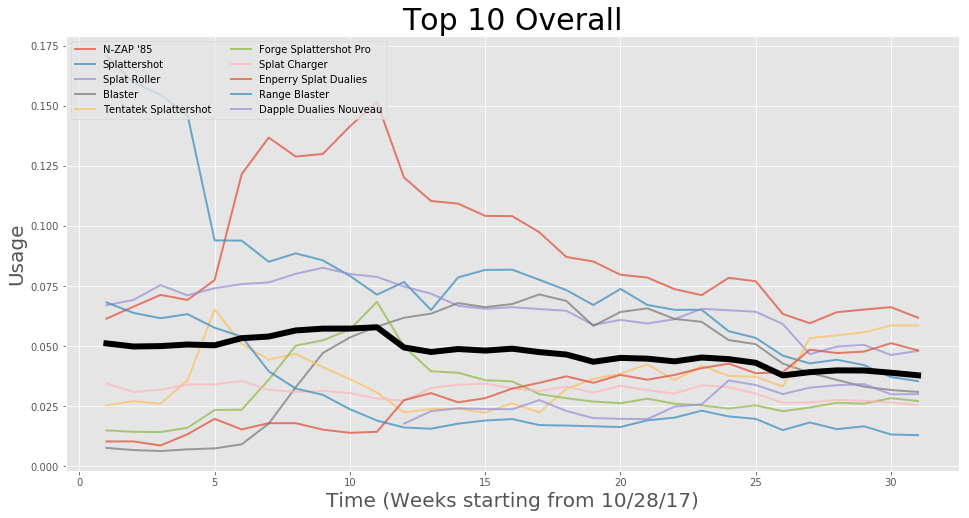

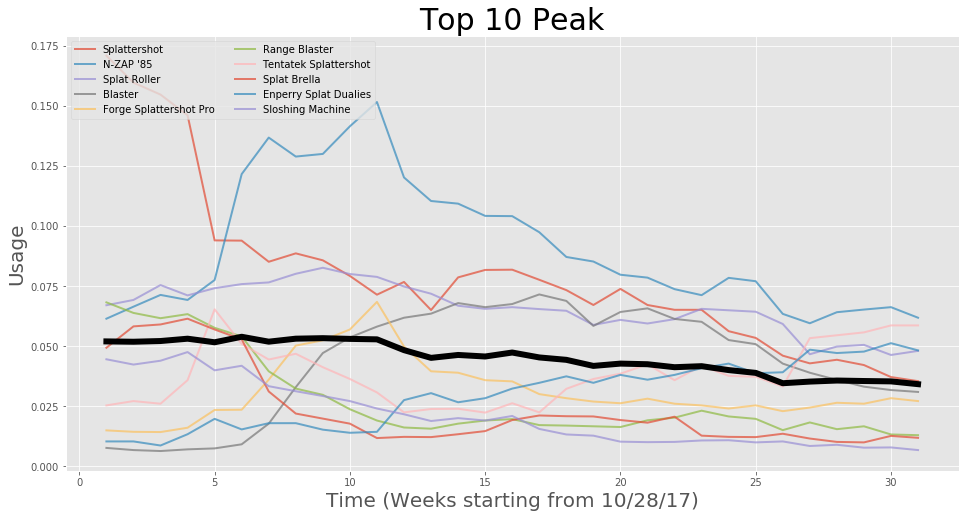

In [9]:
# Plot them all! There's definitely a more elegant way to do this but my function is rudimentary and this works
spaghetti(final, 'Top 10 in Final Week')
spaghetti(overall, 'Top 10 Overall')
spaghetti(peak, 'Top 10 Peak')

A few observations:
* There were a quite a few weapons that showed up in all 3, meaning that they were definitely used often, and a meta is fundamentally based on usage.
* The peaks and highest fluctuations happen early, before 15 weeks, while towards the end all the usage seems to converge. Metas are usually most unstable early in a game's lifetime and tend to stabilize as players figure out the best strategies.
* There is a steady decline in the mean usage on all the plots, this is most likely attributed to more weapons being added in the game leading to dilution.


## Further investigation

I want to look at the weapons that showed up in all 3 top 10 lists and try to uncover the reasons for their high usage.

In [10]:
# Find the weapons present in all 3 previous plots
top = []
for element in usage_df.index:
    if element in final.index and element in overall.index and element in peak.index:
        top.append(element)
top

['Splattershot',
 'Splat Roller',
 "N-ZAP '85",
 'Tentatek Splattershot',
 'Forge Splattershot Pro',
 'Enperry Splat Dualies',
 'Blaster']

There are a lot of shooter (rifle) class weapons in this list, 4 out of 7. There are 1 each of roller (melee), dualies (dual pistols), and blaster (explosive). My personal favorite from this list are the Enperry Splat Dualies. Due to that bias, I will not be focusing on them.
![Enperry Splat Dualies](https://cdn.wikimg.net/en/splatoonwiki/images/6/69/S2_Weapon_Main_Enperry_Splat_Dualies.png)

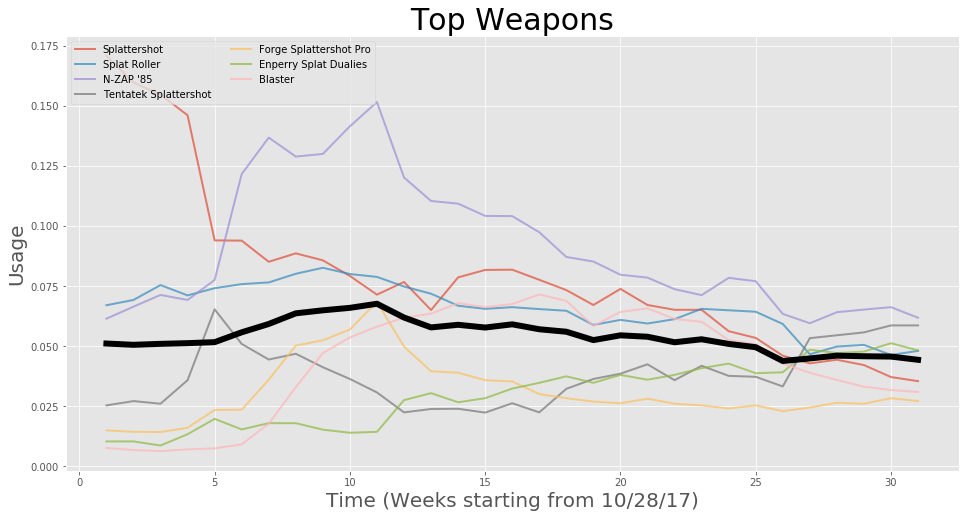

In [24]:
# Plot the previous weapons
spaghetti(usage_df.loc[top,:], 'Top Weapons')

Some observations:
* Two weapons that caught my attention are the Splattershot and Tentatek Splattershot. These are variant weapons, where they have an identical main (gun) but a different sub (grenade) and special. 
* At a glance, the N-ZAP '85 appears to be the most consistently popular weapon. It is quite infamous in the game for being 'overused', expecially in high-level team play where this data is from.

## Testing The N-ZAP '85

![A blast from the past!](https://cdn.wikimg.net/en/splatoonwiki/images/e/e9/S2_Weapon_Main_N-ZAP_%2785.png)

The N-ZAP was (and still is) extremely prevalent, at one point it was pretty much expected that there would always be at least 1 in a game of 8 players.

The two main reasons that the community thought the N-ZAP was powerful at the time were:
* It is a Shooter (rifle) class main weapon, which is considered the most versitile of the weapon types.
* It has the Ink Armor special, which was considered almost mandatory in high-level team play due to its power in team fights.

The three things I want to test are:
1. How often does it show up in a game assuming each player chooses their weapon independently. This is definitely a false assumption but it will give a rough idea of its prevalence.
2. Is it the most popular shooter overall?
3. Is it the Ink Armor weapon of choice by a significant margin?

To test the Shooter theory, I will compare the usages of the N-ZAP '85 to the the other shooters that made it into the top weapons list.
* Splattershot
* Tentatek Splattershot
* Forge Splattershot Pro
* Enperry Splat Dualies

I also include the Emperry Splat Dualies since it overlaps quite a bit with the N-ZAP in role and playstyle and is more similar to it than the Forge Splattershot Pro.

In [23]:
shooter = usage_df.reindex(["N-ZAP '85", 'Splattershot', 'Tentatek Splattershot', 'Forge Splattershot Pro', 'Enperry Splat Dualies'])
shooter

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587
Forge Splattershot Pro,0.0150,0.0144,0.0143,0.0161,0.0235,0.0236,0.0361,0.0503,0.0525,0.0570,...,0.0261,0.0254,0.0241,0.0254,0.0230,0.0245,0.0265,0.0261,0.0284,0.0272
Enperry Splat Dualies,0.0104,0.0104,0.0087,0.0134,0.0198,0.0154,0.0180,0.0180,0.0153,0.0140,...,0.0381,0.0409,0.0428,0.0388,0.0392,0.0486,0.0472,0.0478,0.0513,0.0483


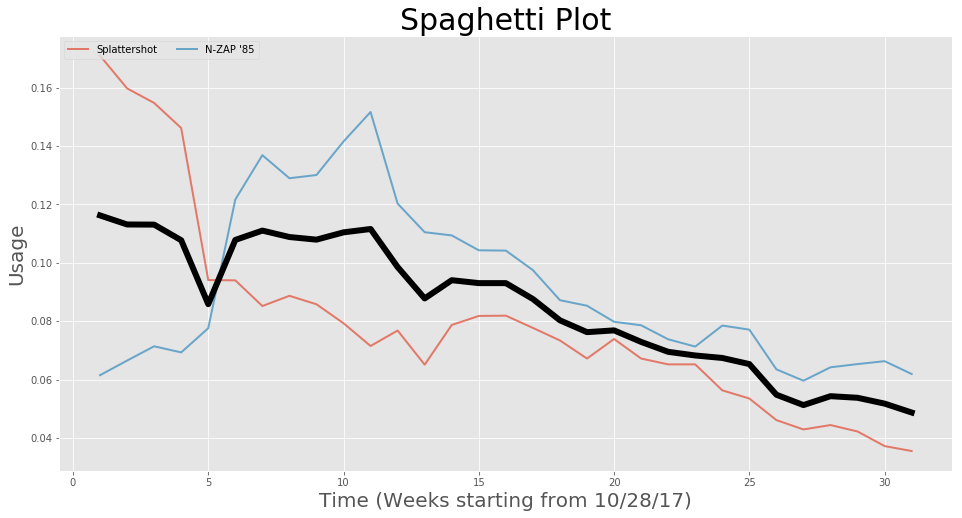

In [13]:
spaghetti(shooter)

Now I will test if the N-ZAP '85 is more used the Splattershot.

$$ p_N = P(\text{player uses N-ZAP '85}) $$
$$ p_S = P(\text{player uses Splattershot}) $$

$$ H_0: \ p_N \leq p_S $$
$$ H_a: \ p_N > p_S $$

## Ink Armor Testing

In [14]:
# Selecting all weapons with Ink Armor
ink_armor = ['.96 Gal', 'Classic Squiffer', 'Gold Dynamo Roller', 'H-3 Nozzlenose D', "N-ZAP '85", 'Rapid Blaster Pro Deco', 'Splattershot Jr.', 'Tri-Slosher']
ia_df = usage_df.reindex(ink_armor)

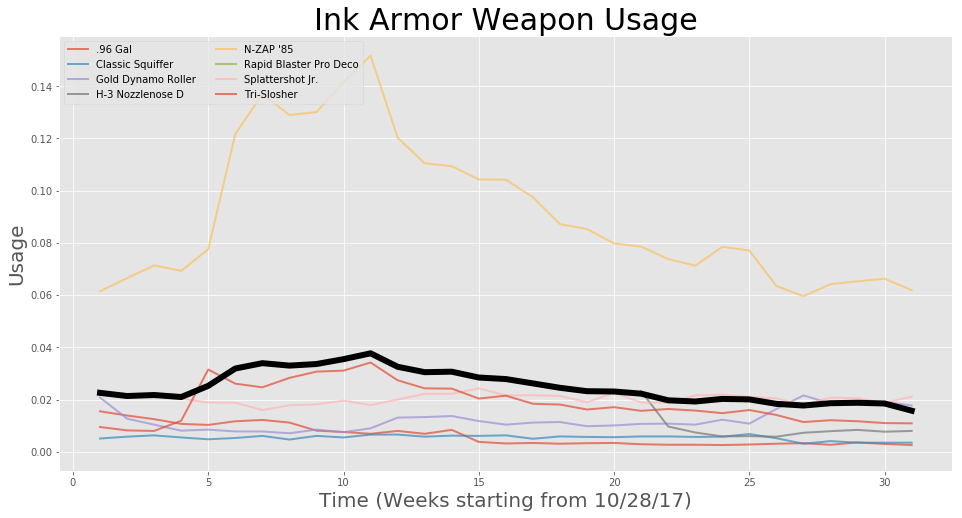

In [15]:
spaghetti(ia_df, 'Ink Armor Weapon Usage')

It looks like the N-ZAP '85 has more usage than all other ink armor weapons combined. I personally saw a lot of Tri-Sloshers, but looks like they are not as prevalent in high-level play.

In [16]:
# Extract N-Zap row
nzap = ia_df.reindex(["N-ZAP '85"])
nzap

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.129,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619


In [17]:
# Sum all other columns
others =  ia_df.drop(["N-ZAP '85"])
others = pd.DataFrame(others.sum(), columns=['Other Weapons']).transpose()
others

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Other Weapons,0.074,0.0617,0.0591,0.0566,0.074,0.0697,0.0668,0.0691,0.0716,0.0713,...,0.0643,0.0636,0.0633,0.0634,0.0651,0.0645,0.0661,0.0662,0.0632,0.0641


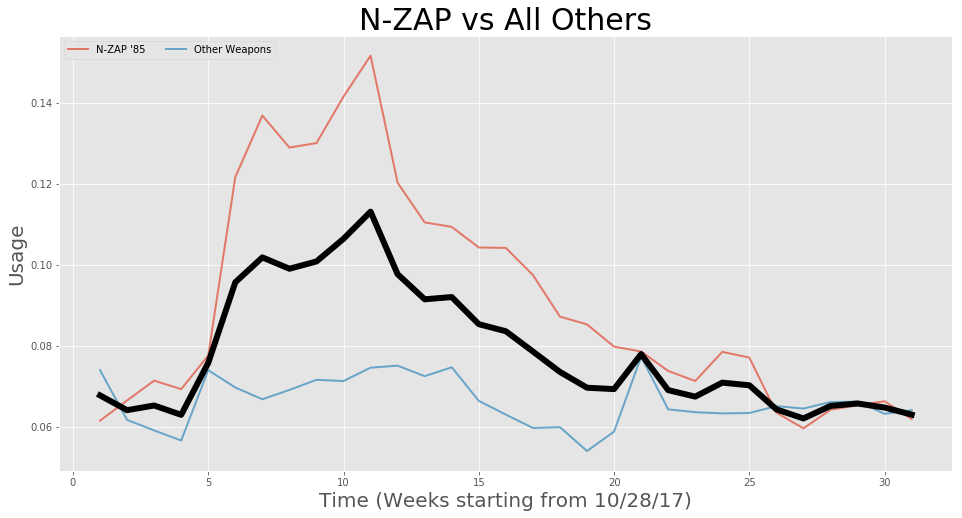

In [18]:
spaghetti(pd.concat([nzap, others]), 'N-ZAP vs All Others')

It looks like my initial assumption was correct. Now I will test if the N-ZAP '85 is more used than all other Ink Armor weapons combined.

$$ p_N = P(\text{player uses N-ZAP '85}) $$
$$ p_W = P(\text{player uses any other Ink Armor weapon}) $$

$$ H_0: \ p_N \leq p_W $$
$$ H_a: \ p_N > p_W $$